## Machine Learning Project

In this project we will be creating a machine learning model that will predict whether the patient has heart-disease or not based on their medical data.

## Data 

This data is obtained from kaggle under the uci heart-disease dataset

Description of each columns

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. num: the predicted attribute

# Importing important libraries and data

In [54]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#This commands ensures all graphs are plotted in jupyter notebook
%matplotlib inline

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation and preparation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (D:\ml_project3\env\lib\site-packages\sklearn\metrics\__init__.py)

# Data preprocessing and Description

# Data description

In [2]:
#Loading data into a dataframe
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
#Finding how many classes and count of each class
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

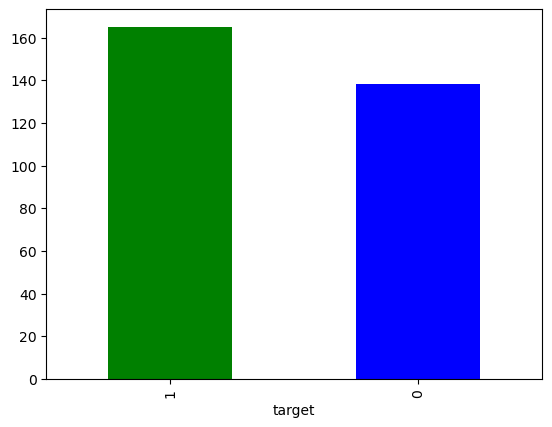

In [5]:
df['target'].value_counts().plot.bar(color=['green','blue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Heart disease frequency according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
#compare target and sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Text(0.5, 0, ' 0 = no heart disease , 1= has heart disease')

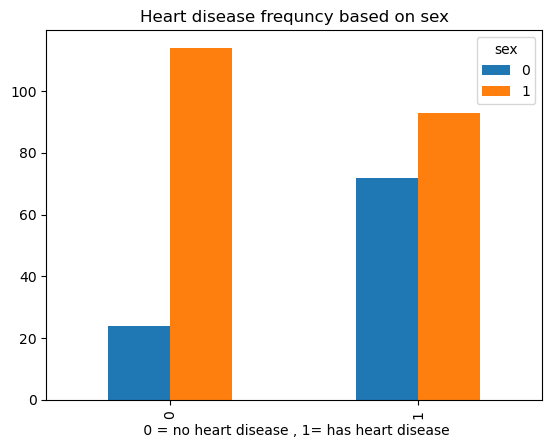

In [10]:
pd.crosstab(df.target,df.sex).plot.bar()

plt.title("Heart disease frequncy based on sex")
plt.xlabel(" 0 = no heart disease , 1= has heart disease")


In [11]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

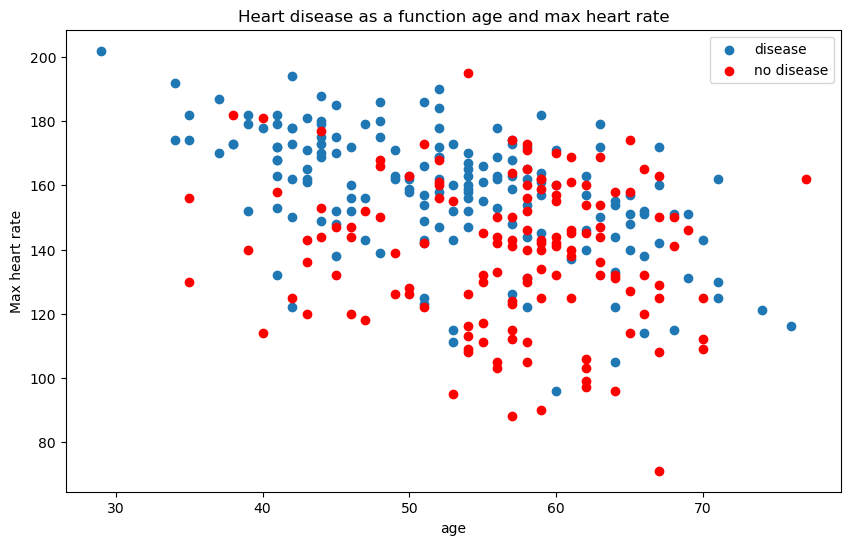

In [12]:
#Creating a figure
plt.figure(figsize=(10,6))

#Scatter with positive samples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])

#Scatter with negative samples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='red')

#Addig title and labels
plt.title("Heart disease as a function age and max heart rate")
plt.xlabel("age")
plt.ylabel('Max heart rate')
plt.legend(['disease','no disease']);

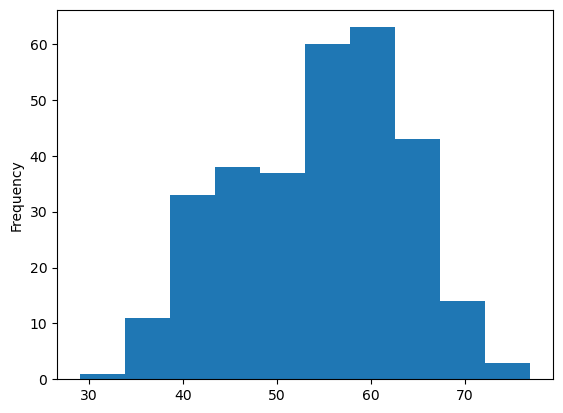

In [13]:
#Checking distrubution of age column
df.age.plot.hist();

In [14]:
#Heart disease frequncy per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


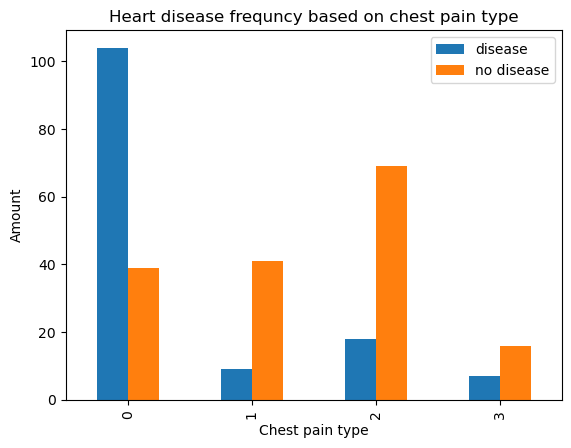

In [15]:
pd.crosstab(df.cp,df.target).plot.bar();

plt.title("Heart disease frequncy based on chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(['disease','no disease']);

In [16]:
#Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


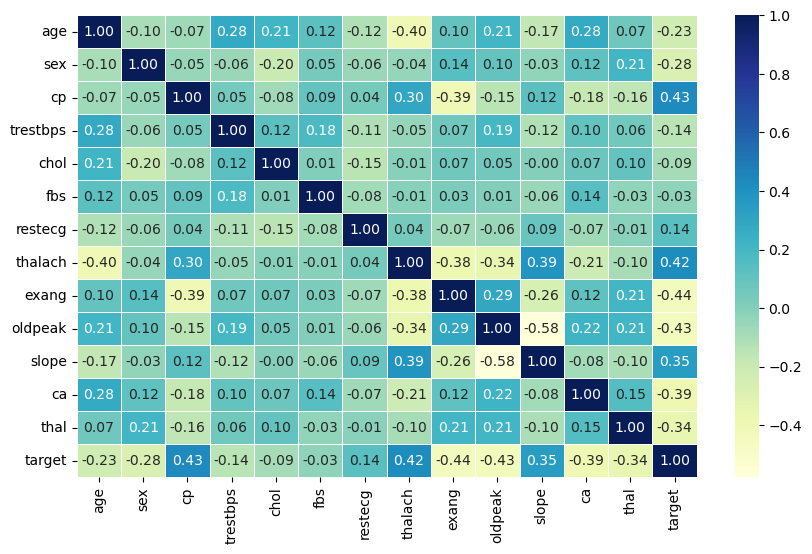

In [17]:
cor_matrix=df.corr()
fig , ax =plt.subplots(figsize=(10,6))
ax = sns.heatmap(cor_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu');

# Data Preprocessing

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data is numeric so it can directly be sent to split it into train and test set

In [19]:
# X is the input features and y is the labels
X = df.drop('target',axis=1)
y = df['target']

In [20]:
X[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
#Setting random seed
np.random.seed(42)

#Splitting the data into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [23]:
X_train[:5],len(X_train)

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 287   57    1   1       154   232    0        0      164      0      0.0   
 282   59    1   2       126   218    1        1      134      0      2.2   
 197   67    1   0       125   254    1        1      163      0      0.2   
 158   58    1   1       125   220    0        1      144      0      0.4   
 164   38    1   2       138   175    0        1      173      0      0.0   
 
      slope  ca  thal  
 287      2   1     2  
 282      1   1     1  
 197      1   2     3  
 158      1   4     3  
 164      2   4     2  ,
 227)

In [24]:
y_train[:5],len(y_train)

(287    0
 282    0
 197    0
 158    1
 164    1
 Name: target, dtype: int64,
 227)

## Training and Evaluation of models

We will train 3 models on the heart-disease dataset

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [25]:
#Storing the models in a dictionary
models = {"Logistics Regression":LogisticRegression(),
          "K-Nearest Neighbors Classifier":KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier()}

#Creating a fucntion to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the given machine learning models
    models: A dictionary of different models
    X_train and y_train: Training data X(no labels) y(labels)
    X_test and y_test: Testing data X(no labels) y(labels)
    """
    #Set random seed
    np.random.seed(42)
    
    #Dictionary to keep model scores
    model_scores={}
    
    for name,model in models.items():
        #Fit model to the data
        model.fit(X_train,y_train)
        #Evaluate the model and add it to the dictionary
        model_scores[name]=model.score(X_test,y_test)
    
    return model_scores

In [26]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

D:\ml_project3\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regression': 0.881578947368421,
 'K-Nearest Neighbors Classifier': 0.6973684210526315,
 'Random Forest Classifier': 0.8157894736842105}

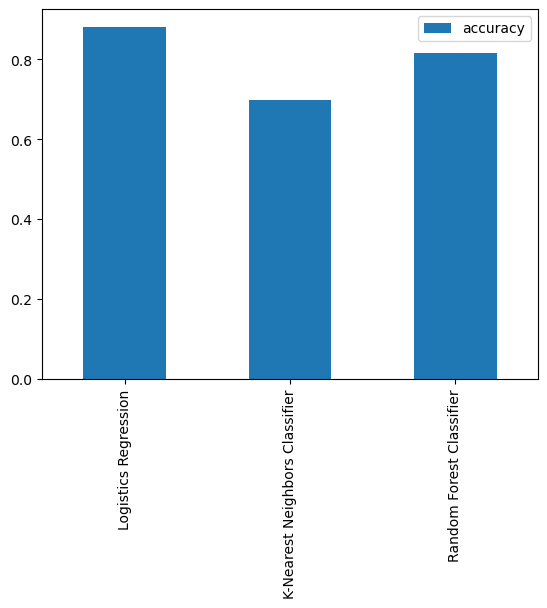

In [27]:
#Visualizing the score without hyperparamter tuning
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

# Hyper-Parameter Tuning

In [28]:
# Tuning KNN

train_scores=[]
test_scores=[]

#Creating a list of different values for n_neighbors
neighbors = range(1,21)

#Setting up KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


Maximum score for the KNN model on test data is 75.00


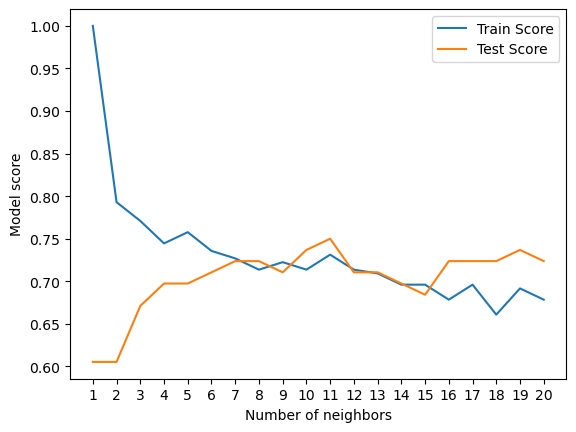

In [29]:
#Visualizing training and test scores
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score for the KNN model on test data is {max(test_scores)*100:.2f}")

# Hyper Parameter tuning with Randomized Search CV

In [37]:
#Creating hyper parameter grid for Logistic regression
log_reg_grid = {'C':np.logspace(-4,4,20),'solver':["liblinear"]}

#Creating a hyper parameter grid for Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [48]:
#Tuning Logistic Regression
np.random.seed(42)

#Setup Random hyper parameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fitting Random Hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test,y_test)

0.8947368421052632

In [41]:
#Tuning Random Forest Classifier
np.random.seed(42)

#Setup Random hyper parameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fitting Random Hyperparameter search model for Random Forest Classifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [43]:
rs_rf.score(X_test,y_test)

0.8421052631578947

In [47]:
#Creating hyper parameter grid for Logistic regression
log_reg_grid = {'C':np.logspace(-4,4,30),'solver':["liblinear"]}

#Setup Random hyper parameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)

#Fitting Random Hyperparameter search model for Logistic Regression
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
gs_log_reg.score(X_test,y_test)

0.8947368421052632

## Evaluation of the Model

In [52]:
#Make prediction with the tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

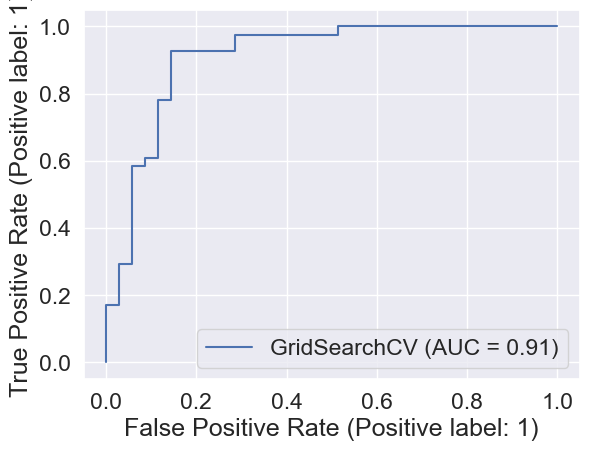

In [75]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [56]:
print(confusion_matrix(y_test,y_preds))

[[30  5]
 [ 3 38]]


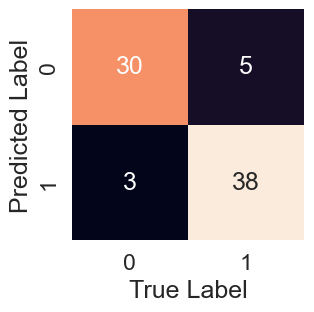

In [58]:
#Visualizing the confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a confusion matrix
    """
    fig , ax = plt.subplots(figsize=(3,3)) 
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test,y_preds)

In [59]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.88      0.93      0.90        41

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



## Evaluation metrics using cross-validation

In [60]:
#check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [61]:
#Create new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [63]:
#Cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
np.mean(cv_acc)

0.8446994535519124

In [67]:
#Cross validation precision
cv_pre = cross_val_score(clf,X,y,cv=5,scoring='precision')
np.mean(cv_pre)

0.8207936507936507

In [68]:
#Cross validation recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_rec)

0.9212121212121213

In [69]:
#Cross validation f1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8673007976269721

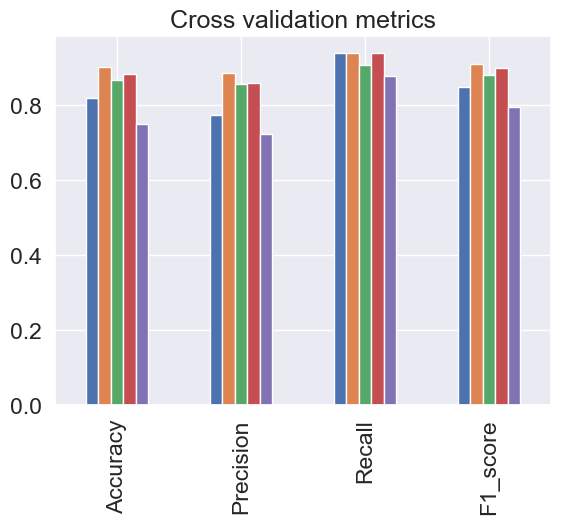

In [74]:
#Visualizing cross validation metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_pre,
                           "Recall":cv_rec,
                           "F1_score":cv_f1})

cv_metrics.T.plot.bar(title="Cross validation metrics",
                      legend=False);

# Finding Feature Importance

In [76]:
#Fit an instance of the Logistic Regression model
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [77]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
clf.coef_

array([[ 0.00503922, -0.76947823,  0.68812983, -0.00991718, -0.00127897,
         0.00226276,  0.40721864,  0.02147257, -0.60142004, -0.54531813,
         0.45519223, -0.6569426 , -0.70184842]])

In [79]:
#Matching coef's features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.005039219028197717,
 'sex': -0.7694782261251526,
 'cp': 0.6881298272584871,
 'trestbps': -0.009917184184719494,
 'chol': -0.0012789704596882492,
 'fbs': 0.002262758498285967,
 'restecg': 0.40721864391970897,
 'thalach': 0.02147257412019282,
 'exang': -0.6014200434372448,
 'oldpeak': -0.5453181276533761,
 'slope': 0.4551922319697744,
 'ca': -0.6569426022962225,
 'thal': -0.7018484174338481}

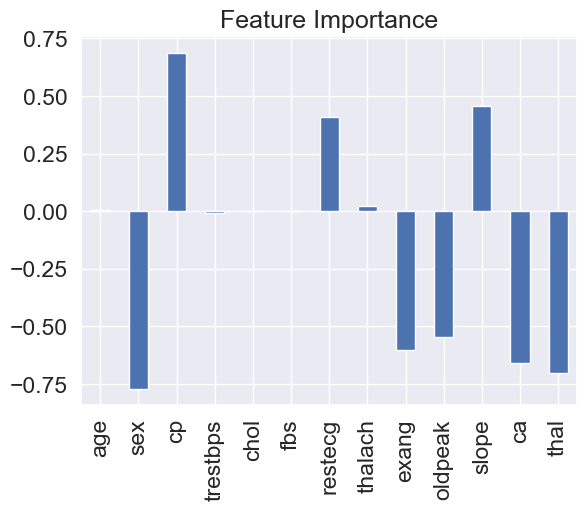

In [80]:
#Visualizing Feature Importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [81]:
#Saving the model
import pickle
pickle.dump(clf,open('heart-diseas-model.pk1','wb'))